In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# Clean data path
clean_data_path = "../data/games_clean.csv"

In [3]:
# Default figure size
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
# Dataframe with Pandas
chess_df = pd.read_csv(clean_data_path)
chess_df

,rated,turns,victory_status,winner,time,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
1,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
2,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
3,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5
4,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...
16150,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,2
16151,True,82,mate,black,10+0,1233,1196,A41,Queen's Pawn,2
16152,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
16153,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,4


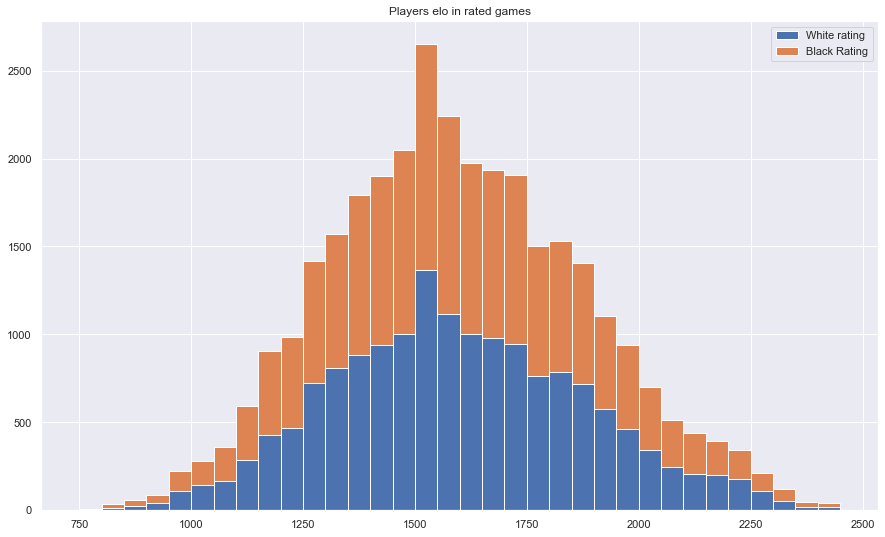

In [62]:
# Players elo in rated games

plt.title("Players elo in rated games")
plt.hist([chess_df.white_rating, chess_df.black_rating], stacked=True, bins= np.arange(750, 2500, 50))
plt.legend(["White rating", "Black Rating"])

In [7]:
# Grouping by opening name
chess_openings_df = chess_df.groupby("opening_name")

# Counting by opening name
chess_openings_df = chess_openings_df["opening_name"].count()

# To Pandas dataframe
chess_openings_df = chess_openings_df.to_frame()

# Rename count column
chess_openings_df.rename(columns={ chess_openings_df.columns[0]: "number_of_occurrences"}, inplace = True)
chess_openings_df

,number_of_occurrences
opening_name,
Alekhine Defense,38
Alekhine Defense #2,3
Alekhine Defense #3,1
Alekhine Defense: Balogh Variation,1
Alekhine Defense: Brooklyn Variation,2
...,...
Zukertort Opening: Sicilian Invitation,29
Zukertort Opening: Slav Invitation,8
Zukertort Opening: Tennison Gambit,36


In [54]:
# Sorting by number of occurrences and getting the top 10
chess_openings_df = chess_openings_df.sort_values("number_of_occurrences", ascending=False).head(10)

# Sorting again for better viewing
chess_openings_df = chess_openings_df.sort_values("number_of_occurrences")

top10_chess_openings = chess_openings_df

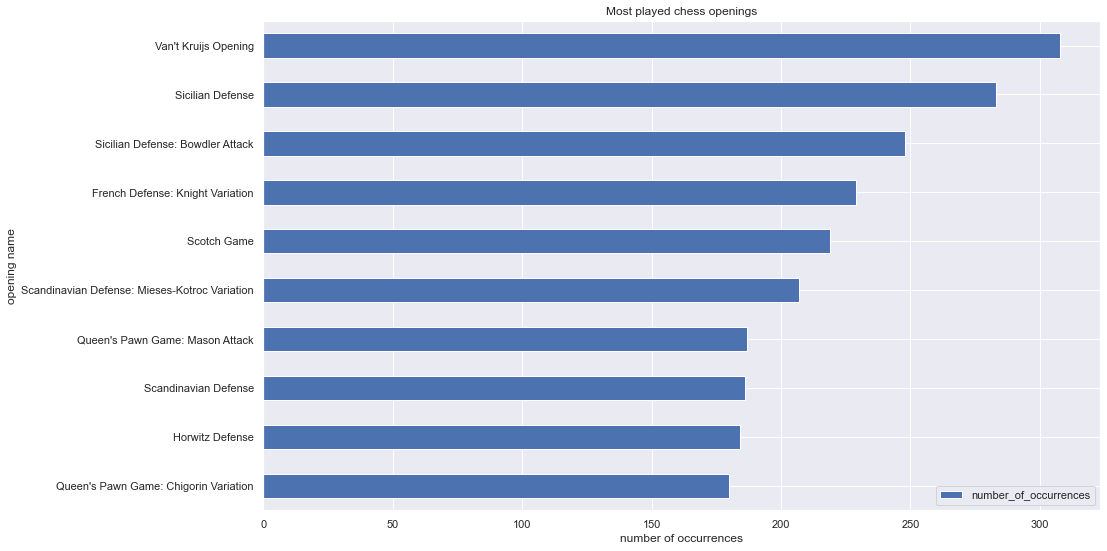

In [55]:
top10_chess_openings.plot.barh()
 
plt.xlabel("number of occurrences")
plt.ylabel("opening name")
plt.title("Most played chess openings")
plt.show()

In [65]:
# Grouping by time
chess_time_df = chess_df.groupby("time")

# Counting by time
chess_time_df = chess_time_df["time"].count()

# To Pandas dataframe
chess_time_df = chess_time_df.to_frame()

# Rename count column
chess_time_df.rename(columns={ chess_time_df.columns[0]: "number_of_occurrences"}, inplace = True)
chess_time_df

,number_of_occurrences
time,
0+12,5
0+13,1
0+15,6
0+16,15
0+20,1
...,...
90+0,9
90+120,1
90+30,12


In [66]:
# Sorting by number of occurrences and getting the top 10
chess_time_df = chess_time_df.sort_values("number_of_occurrences", ascending=False).head(10)

# Sorting again for better viewing
chess_time_df = chess_time_df.sort_values("number_of_occurrences")

top10_chess_openings = chess_time_df

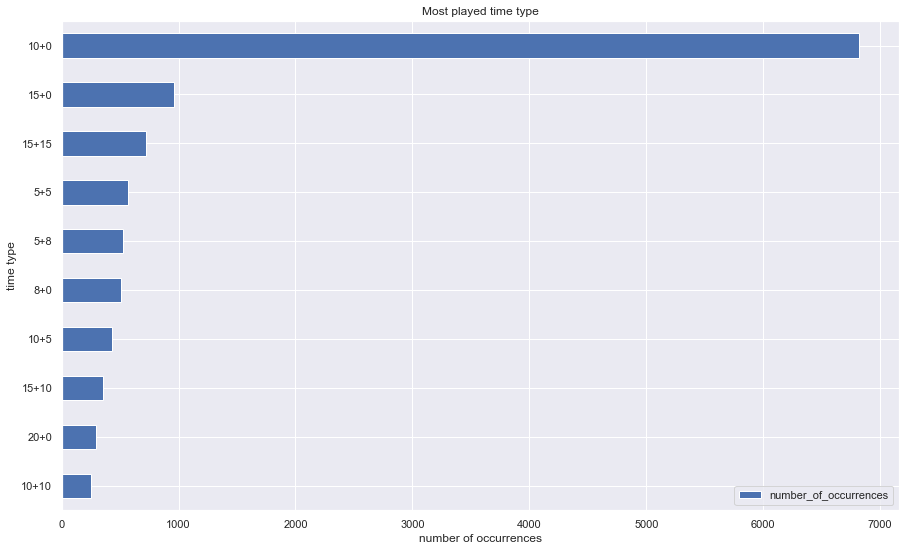

In [67]:
top10_chess_openings.plot.barh()
 
plt.xlabel("number of occurrences")
plt.ylabel("time type")
plt.title("Most played time type")
plt.show()

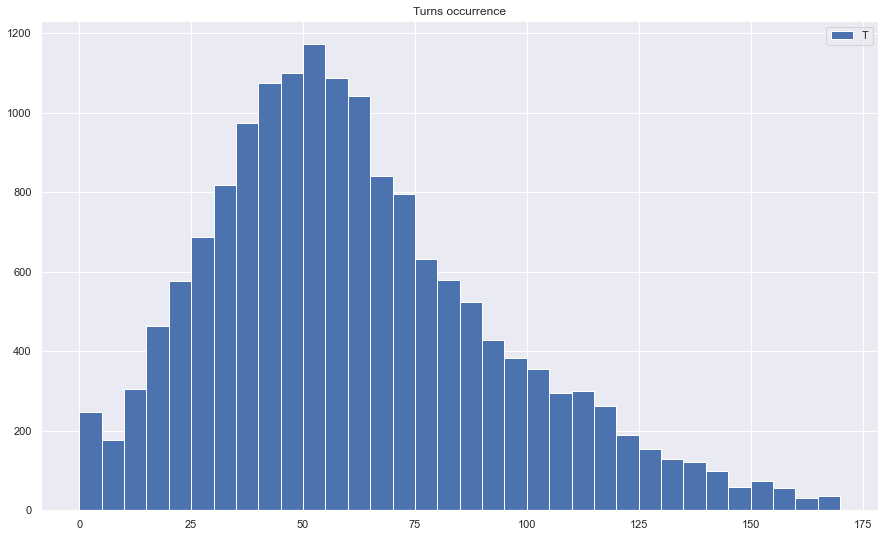

In [75]:
# Turns occurrence

plt.title("Turns occurrence")
plt.hist([chess_df.turns], bins= np.arange(0, 175, 5))
plt.legend("Turns")

In [96]:
# Grouping by victory status
chess_victory_status_df = chess_df.groupby("victory_status")

# Counting by victory status
chess_victory_status_df = chess_victory_status_df["victory_status"].count()

# To Pandas dataframe
chess_victory_status_df = chess_victory_status_df.to_frame()

# Rename count column
chess_victory_status_df.rename(columns={ chess_victory_status_df.columns[0]: "occurrences"}, inplace = True)
chess_victory_status_df

,occurrences
victory_status,
draw,681
mate,5146
outoftime,1359
resign,8969


<AxesSubplot:ylabel='occurrences'>

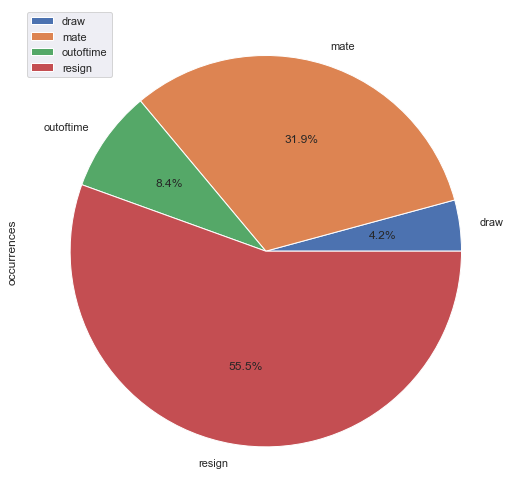

In [99]:
chess_victory_status_df.plot.pie(y='occurrences', autopct='%1.1f%%')

In [98]:
# Grouping by winner
chess_winner_status_df = chess_df.groupby("winner")

# Counting by winner
chess_winner_status_df = chess_winner_status_df["winner"].count()

# To Pandas dataframe
chess_winner_status_df = chess_winner_status_df.to_frame()

# Rename count column
chess_winner_status_df.rename(columns={ chess_winner_status_df.columns[0]: "occurrences"}, inplace = True)
chess_winner_status_df

,occurrences
winner,
black,7384
draw,719
white,8052


<AxesSubplot:ylabel='occurrences'>

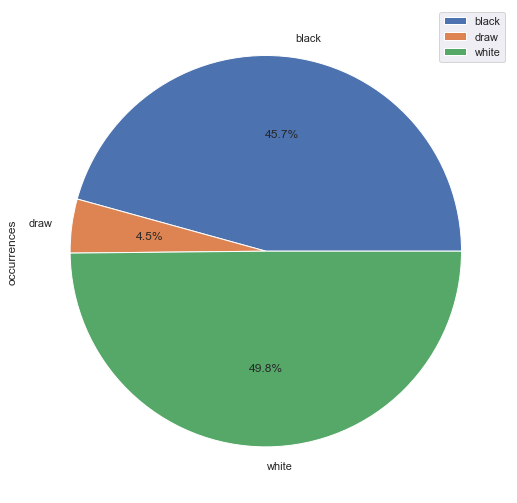

In [100]:
chess_winner_status_df.plot.pie(y='occurrences', autopct='%1.1f%%')